In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('C:/Users/acerpc/Desktop/data_folder/imb_train.csv')
test = pd.read_csv('C:/Users/acerpc/Desktop/data_folder/imb_test.csv')
train.head()

,X1,X2,X3,X4,X5,cls
0,-1.249738,1.445085,-1.725502,-1.240094,-0.486357,0
1,1.094761,-1.754265,0.777568,-1.016829,-1.500572,0
2,-0.749148,0.825491,-1.280002,-0.918879,-0.452324,0
3,0.529419,-0.912219,-0.404428,-0.766775,-0.977623,0
4,0.098122,-0.293959,0.385421,-0.679932,-0.673869,0


In [3]:
x_train = train.loc[:,:'X5'];y_train = train['cls']
x_test = test.loc[:,:'X5'];y_test = test['cls']

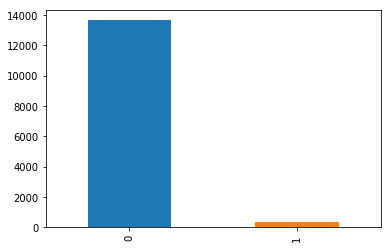

In [5]:
count_classes = train['cls'].value_counts()
count_classes.plot(kind='bar')

In [7]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.combine import SMOTETomek

In [8]:
ros = RandomOverSampler(random_state=0,sampling_strategy='auto')#随机过采样
sos = SMOTE(sampling_strategy='auto',random_state=0)#SMOTE过采样
kos = SMOTETomek(sampling_strategy='auto',random_state=0)#综合采样

In [9]:
x_ros,y_ros = ros.fit_sample(x_train,y_train)
x_sos,y_sos = sos.fit_sample(x_train,y_train)
x_kos,y_kos = kos.fit_sample(x_train,y_train)

In [16]:
print('ros\n',pd.Series(y_ros).value_counts(),'sos\n',pd.Series(y_sos).value_counts(),'kos\n',pd.Series(y_kos).value_counts())

ros
 1    13644
0    13644
dtype: int64 sos
 1    13644
0    13644
dtype: int64 kos
 1    13395
0    13395
dtype: int64


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':list(range(10,21)),'min_samples_split':list(range(80,151,5)),'min_samples_leaf':list(range(20,61)),'n_estimators':list(range(80,151))}
rfc = RandomForestClassifier(oob_score=True)
cv = GridSearchCV(rfc,param_grid,cv=5,scoring='roc_auc')

In [ ]:
cv.fit(x_ros,y_ros)

In [ ]:
from sklearn import metrics

print(metrics.classification_report(y_test,cv.predict(x_test)),'\nroc',metrics.roc_auc_score(y_test,cv.predict_proba(x_test)))

In [ ]:
cv.fit(x_sos,y_sos)
print(metrics.classification_report(y_test,cv.predict(x_test)),'\nroc',metrics.roc_auc_score(y_test,cv.predict_proba(x_test)))

In [ ]:
cv.fit(x_kos,y_kos)
print(metrics.classification_report(y_test,cv.predict(x_test)),'\nroc',metrics.roc_auc_score(y_test,cv.predict_proba(x_test)))